# Surface Lattice: Multi-layers

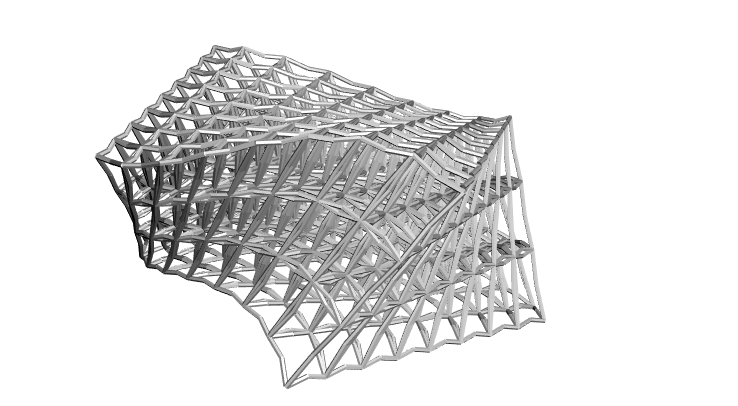

In [1]:
# install genysis library with: pip install genysis
import genysis
t = "REPLACE_WITH_YOUR_TOKEN" # replace with your valid token

# upload and visualize the base surface for the lattice
genysis.upload("models/surface1.stp","surface1.stp",t)
genysis.upload("models/surface2.stp","surface2.stp",t)

genysis.visualize(["surface1.stp","surface2.stp"],t,True)

Welcome to GENYSIS
('uploading file size:', 0.006, 'MB')
[====================================================]105%
successfully uploaded models/surface1.stp as surface1.stp
('uploading file size:', 0.006, 'MB')
[====================================================]105%
successfully uploaded models/surface2.stp as surface2.stp
https://studiobitonti.appspot.com/apps/visualize?name=surface1.stp,surface2.stp&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=surface1.stp,surface2.stp&t=REPLACE_WITH_YOUR_TOKEN'

In [2]:
sl = genysis.surfaceLattice()
sl.setSurfaces(["surface1.stp","surface2.stp"]) # 2 or more surfaces can be used as input to create a loft-like grid
sl.setDivision(u=8,v=8,w=3) # set UVW division between surfaces
sl.genGrid(t) # generate the grid

genysis.visualize(sl.gridOutput,t,True) # visualize the grid

('request: ', '{"surfaces": ["surface1.stp", "surface2.stp"], "div_U": 8, "div_W": 3, "div_V": 8, "t": "REPLACE_WITH_YOUR_TOKEN", "output": "temp.json"}')
('response: ', u'["temp.json"]\n')
https://studiobitonti.appspot.com/apps/visualize?name=temp.json&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=temp.json&t=REPLACE_WITH_YOUR_TOKEN'

In [3]:
genysis.genLatticeUnit(case=2,chamfer=0,centerChamfer=0,bendIn=0.1,cBendIn=0,connectPt=0,output="cell_0.obj",token=t)
sl.setComponent("cell_0.obj")
sl.setOutput("surface_lattice_lines_multilayer.obj")
sl.populateLattice(t)

genysis.visualize("surface_lattice_lines_multilayer.obj",t,True)

('request: ', '{"case": 2, "cBendIn": 0, "chamfer": 0, "bendIn": 0.1, "centerChamfer": 0, "filename": "cell_0.obj", "t": "REPLACE_WITH_YOUR_TOKEN", "connectPt": 0}')
('response: ', u'["cell_0.obj"]')
('request: ', '{"EPSILON": 0.01, "component": "cell_0.obj", "filename": "surface_lattice_lines_multilayer.obj", "blendTargets": [], "boxes": "temp.json", "t": "REPLACE_WITH_YOUR_TOKEN"}')
('response: ', u'["surface_lattice_lines_multilayer.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=surface_lattice_lines_multilayer.obj&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=surface_lattice_lines_multilayer.obj&t=REPLACE_WITH_YOUR_TOKEN'

In [4]:
# mesh the obj lines at thickness of 0.2
genysis.marchingCube(
    lines="surface_lattice_lines_multilayer.obj",
    resolution=300,
    memberThickness=0.2,
    filename="surface_lattice_meshed_multilayer.obj",
    preview=True, # set preview to False for final water-tight printable mesh
    token=t)

genysis.visualize("surface_lattice_meshed_multilayer.obj",t,True)

('request: ', '{"memberThickness": 0.2, "lines": "surface_lattice_lines_multilayer.obj", "filename": "surface_lattice_meshed_multilayer.obj", "t": "REPLACE_WITH_YOUR_TOKEN", "preview": true, "resolution": 300}')
('response: ', u'["surface_lattice_meshed_multilayer.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=surface_lattice_meshed_multilayer.obj&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=surface_lattice_meshed_multilayer.obj&t=REPLACE_WITH_YOUR_TOKEN'

In [ ]:
# download final 3D file
genysis.download("surface_lattice_meshed_multilayer.obj","models/surface_lattice_meshed_multilayer.obj",t) 